In [15]:
# L2 ADVERSARIAL PLOTS

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100  # make plots bigger
import numpy as np

In [16]:
# PGD attack

# load in the .npz files containing the adversarial distances
data1 = np.load('../cifar10/pgd_attack_baseline/attack_baseline/pgd_dists.npz')['l2']
data2 = np.load('../cifar10/pgd_attack_baseline/attack_baseline_tik/pgd_dists.npz')['l2']
data3 = np.load('../cifar10/pgd_attack/attack_unregularized/pgd_dists.npz')['l2']
data4 = np.load('../cifar10/pgd_attack/attack_regularized/pgd_dists.npz')['l2']

In [17]:
# only keep strictly positive distances (ignore abstained attacks or images already misclassified)
data1 = data1[data1>0]
data2 = data2[data2>0]
data3 = data3[data3>0]
data4 = data4[data4>0]

In [18]:
# make cdf (increasing) data
x_axis = np.linspace(0,max([max(data1).item(), max(data2).item(), max(data3).item(), max(data4).item()]), 1000)
data1_cdf = [(data1<x_axis[i]).sum().item()/len(data1) for i in range(1000)]
data2_cdf = [(data2<x_axis[i]).sum().item()/len(data2) for i in range(1000)]
data3_cdf = [(data3<x_axis[i]).sum().item()/len(data3) for i in range(1000)]
data4_cdf = [(data4<x_axis[i]).sum().item()/len(data4) for i in range(1000)]

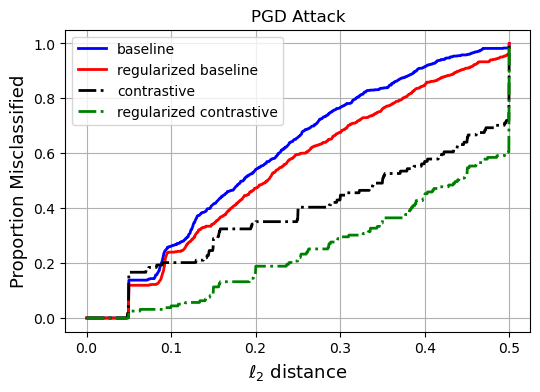

In [19]:
plt.plot(x_axis, data1_cdf, 'b-', label="baseline", linewidth=2)
plt.plot(x_axis, data2_cdf, 'r-', label="regularized baseline", linewidth=2)
plt.plot(x_axis, data3_cdf, 'k-.', label="contrastive", linewidth=2)
plt.plot(x_axis, data4_cdf, 'g-.', label="regularized contrastive", linewidth=2)
#plt.xscale('log')
plt.grid(True)
plt.legend(prop={'size': 10})
plt.xlabel("$\ell_2$ distance", fontsize=13)
plt.ylabel("Proportion Misclassified", fontsize=13)
plt.title("PGD Attack")
plt.savefig('./figures/pgd',bbox_inches='tight')
plt.show()



In [20]:
# PLB attack

# load in the .npz files containing the adversarial distances
data1 = np.load('../cifar10/plb_attack_baseline/attack_baseline/proxlogbarrier-L2.npz')['l2']
data2 = np.load('../cifar10/plb_attack_baseline/attack_baseline_tik/proxlogbarrier-L2.npz')['l2']
data3 = np.load('../cifar10/plb_attack/attack_unregularized/proxlogbarrier-L2.npz')['l2']
data4 = np.load('../cifar10/plb_attack/attack_regularized_exact/proxlogbarrier-L2.npz')['l2']

In [21]:
# only keep strictly positive distances (ignore abstained attacks or images already misclassified)
data1 = data1[data1>0]
data2 = data2[data2>0]
data3 = data3[data3>0]
data4 = data4[data4>0]

In [22]:
# make cdf (increasing) data
x_axis = np.linspace(0,max([max(data1).item(), max(data2).item(), max(data3).item(), max(data4).item()]), 1000)
data1_cdf = [(data1<x_axis[i]).sum().item()/len(data1) for i in range(1000)]
data2_cdf = [(data2<x_axis[i]).sum().item()/len(data2) for i in range(1000)]
data3_cdf = [(data3<x_axis[i]).sum().item()/len(data3) for i in range(1000)]
data4_cdf = [(data4<x_axis[i]).sum().item()/len(data4) for i in range(1000)]

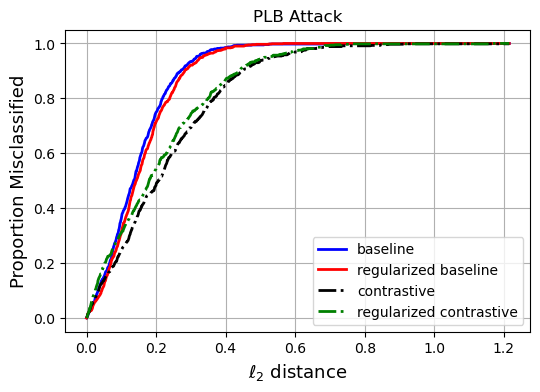

In [23]:
plt.plot(x_axis, data1_cdf, 'b-', label="baseline", linewidth=2)
plt.plot(x_axis, data2_cdf, 'r-', label="regularized baseline", linewidth=2)
plt.plot(x_axis, data3_cdf, 'k-.', label="contrastive", linewidth=2)
plt.plot(x_axis, data4_cdf, 'g-.', label="regularized contrastive", linewidth=2)
#plt.xscale('log')
plt.grid(True)
plt.legend(prop={'size': 10})
plt.xlabel("$\ell_2$ distance", fontsize=13)
plt.ylabel("Proportion Misclassified", fontsize=13)
plt.title("PLB Attack")
plt.savefig('./figures/plb',bbox_inches='tight')
plt.show()


